In [18]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

In [19]:
X, _ = make_blobs(n_samples = 300, 
                  n_features = 2,
                  centers = 1,
                  random_state = 1)
X[0,0] = 10
X[0,1] = -10

In [ ]:
# contamination -> 데이터셋 내 이상 비율
# 실제로 설정을 할 때, Recall을 토대로 조절하면 좋지 않을까 싶다.
outlier_detector = EllipticEnvelope(contamination = .05) 

In [21]:
outlier_detector.fit(X)
pred = outlier_detector.predict(X)

In [22]:
df = pd.DataFrame(X, columns=["col1", "col2"])
df["outlier"] = pred

In [23]:
df

,col1,col2,outlier
0,10.000000,-10.000000,-1
1,-0.975559,4.053080,1
2,-2.879304,6.855859,1
3,-1.615891,4.180176,1
4,-1.461260,4.525499,1
...,...,...,...
295,-0.031909,4.744502,1
296,-2.841878,3.740735,1
297,-0.614565,5.015005,1
298,-2.260717,4.962563,1


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

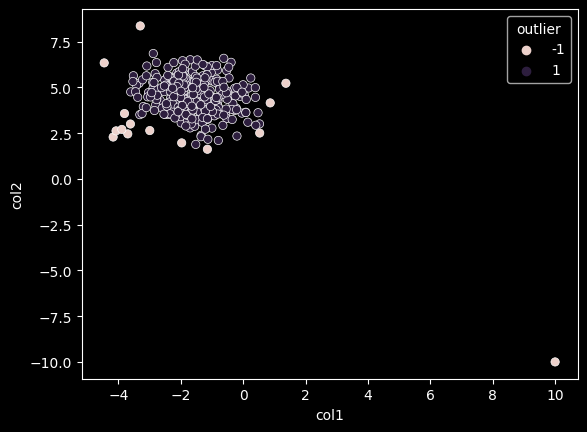

In [25]:
plt.style.use('dark_background')
sns.scatterplot(x = df['col1'], y = df['col2'], hue = df['outlier'])
plt.show()